# Link Analysis
## Preparation

In this practice, we use the [NetworkX](https://networkx.github.io/documentation/stable/index.html), a Python library to handle graph (network) data. Let's run the following codes to load the NetworkX and several libraries to handle and visualize graph data.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt # for visualizing data
import numpy as np # for matrix computation

## Implement PageRank

To implement the PageRank algorithm, let's prepare a small graph. By using NetworkX, we can create and visualize graph data.
In NetworkX, you first should create an empty graph. After that, you can build a graph by adding nodes and edges to the graph.

Let's run the following code to create a toy graph G.

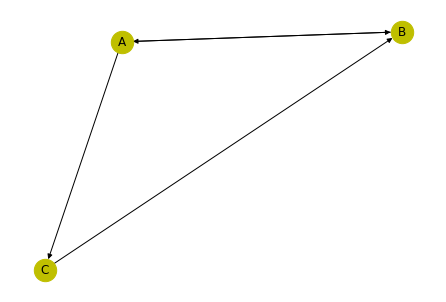

In [2]:
# Initialize a directed graph
G = nx.DiGraph()

# Add edges into graph G.
# Pair (X, Y) means that node X is connecting to node Y.
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('A', 'C'),
                  ('B', 'A'),
                  ('C', 'B')])

pos = nx.spring_layout(G) # setting to draw a graph in on spring layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color="y")
plt.show()

To apply the PageRank algorithm to a graph, we need transition matrix $M$. As I explained in my lecture, transition matrices are created on the assumption that a surfer randomly chooses one of links in a webpage to move to another webpage (with equal probability).

I have prepared a function to extract transition matrix $M$ from a given graph. The function is defined below. Run the below code to load the function.

In [3]:
def get_transition_matrix(G):
    _M = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()))
    M = _M.todense().T / _M.todense().T.sum(axis=0)
    M[np.isnan(M)] = 0
    return M

Let's use this function to extract transition matrix $M$ from the above graph. Run the following code.

In [4]:
M = get_transition_matrix(G)
M

matrix([[0. , 1. , 0. ],
        [0.5, 0. , 1. ],
        [0.5, 0. , 0. ]])

The obtained transition matrix $M$ indicates that node A has two out-links (B and C) and a random surfer will choose one of the two links with 1/2 probability.

To apply the PageRank algorithm to graph $G$, we need to prepare a random jump vector $d$ as well as a transition matrix $M$. Let's prepare it.

Remember that in normal PageRank, a surfer sometimes **randomly** jump to each of webpages in a graph without using links. That means that each element (probability) in a random jump vector is equal. Based on this, we can obtain a random jump vector $d$ with the following code. Run the code to load the function `get_random_jump_vector`.

In [5]:
def get_random_jump_vector(G):
    node_num = len(G)
    d = np.ones((node_num, 1)) / node_num
    return d

Let's use this function to get a random jump vector from graph $G$.

In [6]:
d = get_random_jump_vector(G)
d

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

Now we are ready to implement the PageRank algorithm! 

As I explained in my lecture, we compute PageRank scores of nodes in graph $G$ by iteratively using the following formula:

$p_n = \alpha M p_{n-1} + (1 - \alpha)d$

Here, $M$ is a transition matrix, $d$ id a random jump vector $d$, and $\alpha$ is a parameter to control the random surfer model (usually $\alpha$ is set to 0.85). $p_n$ means the probabilities of radom surfers to stay after n-th transition. If $p_n$ is converged (there is no difference between $p_n$ and $p_{n-1}$), the PageRank algorithm stops and we use the final $p_n$ scores as PageRank scores.

Below, I have prepared the function to compute PageRank (default $\alpha$ parameter is 0.85). Load the following code for PageRank computation.

In [7]:
def compute_pagerank(M, d, alpha=0.85, eps=1e-6, iter_limit=50):
    """
    M: transition matrix
    d: random jump vector
    alpha: a parameter to control the random surfer model
    eps: delta for convergence
    iter_count: iteration count
    """
    n = M.shape[0] # the number of nodes in a graph
    p = np.zeros((n, 1)) # zero vector whose length is n
    p[0,0] = 1 # initial PageRank scores. In this vector, only the first element is one. (i.e., [1, 0, 0, 0, ......, 0])
   
    for iter_count in range(iter_limit):
        p_next = alpha * np.dot(M, p) + (1 - alpha) * d
        if np.linalg.norm(p_next - p, ord=2) <= eps:
            p = p_next
            break
        else:
            p = p_next
    
    return p

Let's use this function to run the PageRank algorithm to the toy graph $G$. Run the following code.

In [8]:
compute_pagerank(M, d, alpha=0.85, eps=1e-6, iter_limit=50)

matrix([[0.38778993],
        [0.39739961],
        [0.21481046]])

We have obtained the PageRank scores! The results indicate that the second node "B" has the largest PageRank score. Node B has many in-links. Therefore, we have an intuition that B can has a high PageRank score. This intutition corresponds to the computational results.

## Assignment

### Assignment 4-1
Given the following graph data, apply the PageRank algorithm to the graph.

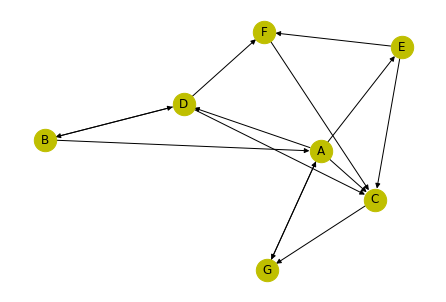

In [9]:
G = nx.DiGraph()
G.add_edges_from([('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'G'),
                  ('B', 'A'), ('B', 'D'),
                  ('C', 'G'),
                  ('D', 'B'), ('D', 'C'), ('D', 'F'),
                  ('E', 'C'), ('E', 'F'),
                  ('F', 'C'),
                  ('G', 'A')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="y")
plt.show()

### Assignment 4-2
The PageRank algorithm iteratively updates $p_n$ by using the following formula. When $p_n$ is converged, the PageRank algorithm stops and the final $p_n$ scores are used as PageRank scores.

$p_n = \alpha M p_{n-1} + (1 - \alpha)d$

Modify the above-implemented function to run the PageRank algorithm and display how $p_n$ scores change until the scores are converged.

### Assignment 4-3
In my PageRank implementation, the initial PageRank scores $p_0$ are set with $[1,0,0,....,0]$. If the initial PageRank scores are set with different values, what will happen to the final PageRank scores? Try to set $p_0$ with different values and check how the final PageRank scores will change.

### Assignment 4-4

Run the following codes to download data for assignment 4-5. The downloaded data is public in [Network Repository](http://networkrepository.com/fb-pages-artist.php).

In [ ]:
!wget http://nrvis.com/download/data/soc/fb-pages-artist.zip
!unzip fb-pages-artist.zip

### Assignment 4-5

The dataset which you download in assignment 4-4 contains two kinds of data:
1. Node data about arists (artist pages) whom Facebook users liked
2. Edge data about mutual likes among artists

For example, the node data contains "The Beatles" node and the node means that a user liked the Facebook page about "The Beatles". Also, the edge data contains an edge between "The Beatles" and "The Rolling Stones". The edge means that a user liked both the pages about "The Beatles" and "The Rollong Stones". In other words, edges in this dataset indicate artist connection on user preference.

Construct a artist preference graph by using the downloaded dataset. Apply the PageRank to the graph to **find the top-30 likable (important) artists.**

#### Note 1
The following code will be useful to load nodes and edges from the downloaded dataset.

In [ ]:
import pandas as pd

# Load node dataset by using pandas library
artist_df = pd.read_csv('fb-pages-artist.nodes').drop("id", axis=1)

# Store the index information about artist ID and artist name
id2artist = {}
for _, row in artist_df.iterrows():
    name = row['name']
    id = row['new_id']
    id2artist[id] = name

# Load edge dataset into variable edges.
edges = []
with open('fb-pages-artist.edges') as f:
    for line in f:
        pair = tuple([int(e) for e in line.rstrip().split(',')])
        edges.append(pair)

#### Note 2
The dataset is large. For fast computation, you should use the ``pagerank`` function which NetworkX library provides. Once you build a graph $G$, you can compute the PageRank scores of the graph by using the following code.

In [ ]:
pr_scores = nx.pagerank(G, alpha=0.85)